# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Things that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Python (Jupyter notebooks) and Linear Regression. Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradient descent

In [4]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist = np.empty((maxsteps, 2))
    xTrans = x.transpose()
    costs = []
    for i in range(0, maxsteps):
        #theta = theta - alpha * x^T * (h - y) / m
        cost, loss = costFunction(x, y, theta)
        costs.append(cost)
        grad = x.transpose().dot(loss) / m
        theta = theta - alpha * grad
        thetaHist[i] = theta.transpose()
    return theta, thetaHist, costs

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the debugging (having not only the cost but also the difference between y and the prediction directly). You do not need to use both. Just the cost is enough to complete the assignment.

In [5]:
def costFunction(x, y, theta):
    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    # (X * theta - y)^T * (X * theta - y)
    h = x.dot(theta)
    # Need to turn y into a column vector for linear algebraic calculations
    tmp_y = y[np.newaxis]
    loss = h - tmp_y.transpose()
    cost = np.sum(loss ** 2) / np.shape(x)[0] 
    return cost, loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with different samples). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [6]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [7]:
m, n = np.shape(x)

## Plot training set


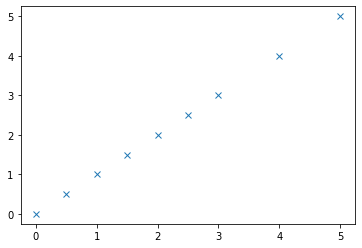

In [8]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [9]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)
J = np.zeros((len(theta0), len(theta1)))
loss = np.zeros((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        J[i, j] = costFunction(x, y, np.array([theta0[i], theta1[j]]))[0]

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


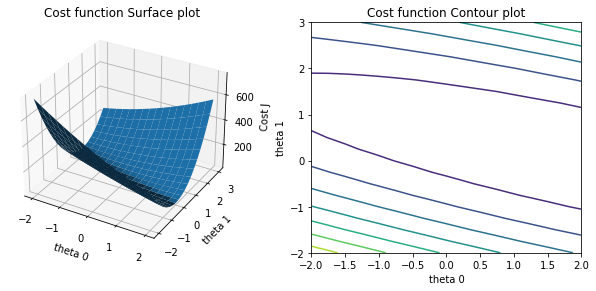

In [10]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [11]:
alpha = 0.05        # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = np.array([[2], [0]])
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)[:2]

## Print found optimal values



In [12]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  [3.98529284e-07]
Optimized Theta1 is  [0.99999987]


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


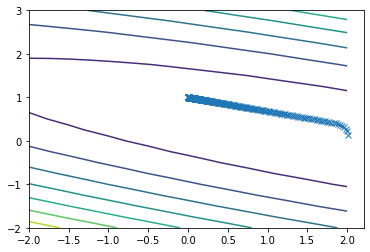

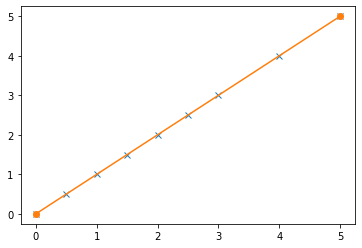

In [13]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
#Note: This line was changed, it had extra brackets around the two values, so h was an array of shape (2, 1, 1),
#which cannot be plotted by matplotlib
h = np.array([thet[1] * xs[0] + thet[0], thet[1] * xs[1] + thet[0]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

# Questions:
## What happens if the learning rate is too high / too low:

/Users/simonkoehl/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/kj/r4bf7thj1gg5bp153_b6nf740000gn/T/ipykernel_6792/1408149967.py:8: RuntimeWarning: overflow encountered in square
  cost = np.sum(loss ** 2) / np.shape(x)[0]


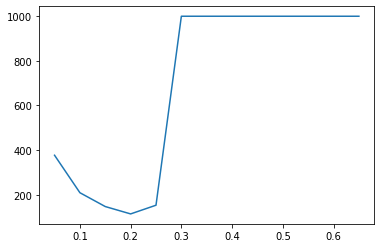

In [14]:
alphas = np.arange(0.05, 0.7, 0.05)       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running
converged_at = []
accuracy = 0.0001
# First estimates for our parameters
for alpha in alphas:
    thet = np.array([[2], [0]])
    theta_hist = gradientDescent(x, y, thet, alpha, m, maxsteps)[1]
    
    #find point of convergence
    prev_theta = np.empty((2,1))
    converged = False
    for i in range(len(theta_hist)):
        if(np.linalg.norm(prev_theta - theta_hist[i]) <= accuracy):
            converged_at.append(i)
            converged = True
            break
        prev_theta = theta_hist[i]
    if not converged:
        converged_at.append(maxsteps)
plt.plot(alphas, converged_at)

In the field above we can see the iteration at which GD converged over alpha. For small alphas it converges at about 100 to 400 epochs, but when alpha increases, the iteration of convergence does too, and at alpha = 0.35 it does not even converge within the given maxsteps = 1000 epochs. Interesting to note also is that, when alpha gets too large, it causes overflows in computing the cost function, probably because the squared loss is too large.

## Can Linear Regression really find the absolute global minimum?
It can, but is not guaranteed to. First of all however, linear regression itself (as implemented here) does not find anything, but Gradient Descent does the optimization. So we implemented Linear Regression using Gradient Descent, which is not guaranteed to find the absolute maximum. One way to test this would be to try different starting thetas, let gradient descent converge and check what the final cost is. Since we are trying to minimize the cost, the smallest final cost would be related to the best starting conditions. So, in conclusion, we can argue that, if we find theta such that it leads to a smaller final cost after maxsteps = 1000 iterations than with the given theta, then we found a better minimum, therefore proving that GD did not find the global minimum thefirst time around, and hence does not always find the absolute global minimum. It can, however, sometimes (!) happen to land on a global minimum. So it can find an absolute global minimum, but it is not guaranteed to.
Note: The tests/experiments for this previously mentioned are not implemented in this report because of lack of time.

## What effect does it have if you change the initial guess for the gradient descent to something completely off?

           x    y
3   1.000000  249
1   7.280110  454
2   9.219545  464
0  10.049876  469


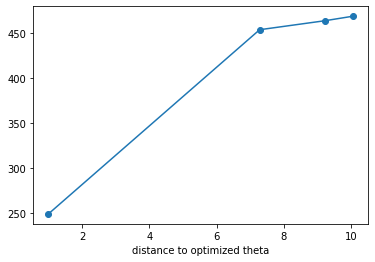

In [15]:
alpha = 0.05        # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

converged_at = []
accuracy = 0.0001
thetas = [np.array([[-10], [0]]), np.array([[-7], [3]]), np.array([[-7], [7]]), np.array([[0], [2]])]
costs = []
# First estimates for our parameters
for thet in thetas:
    theta_hist, costs_computed = gradientDescent(x, y, thet, alpha, m, maxsteps)[1:]
    
    #find point of convergence
    costs.append(costs_computed)
    prev_theta = np.empty((2,1))
    converged = False
    for i in range(len(theta_hist)):
        if(np.linalg.norm(prev_theta - theta_hist[i]) <= accuracy):
            converged_at.append(i)
            converged = True
            break
        prev_theta = theta_hist[i]
    if not converged:
        converged_at.append(maxsteps)
plt.xlabel("distance to optimized theta")
optimal_theta = np.array([[3.98529284e-07], [0.99999987]])
theta_differences = [np.linalg.norm(theta-optimal_theta) for theta in thetas]
import pandas as pd
df = pd.DataFrame(columns = ["x", "y"])
df["x"] = theta_differences
df["y"] = converged_at
df.sort_values(by="x", ascending=True, inplace=True)
print(df)
plt.plot(df["x"], df["y"], "o-")

As you can see above, the higher the distance to the optimal theta vector, the longer it takes GD to converge. However, it is important to mention that, if we had a more complex cost function, then this behaviour would not be guaranteed since new starting conditions could find better optima, as explained above (Note that this is only if we assume our previously optimized theta to be the globally best theta (i.e. the theta that gives a global minimum in the cost function). If we were to get a hold of the actual globally optimal theta, GD could converge quickly, but would then converge to a local optimum). 

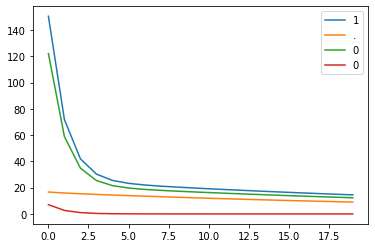

In [16]:
for i in range(len(costs)):
    plt.plot(range(len(costs[i][:20])), costs[i][:20])
    plt.legend(str(theta_differences[i]))

Addition: Here we see that the different starting thetas lead to later convergence.

## What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
Not implemented, not enough time, as this would require to rewrite the linear algebraic code to the original algebraic form to seperate the for loops I think.

## How many iterations of the gradient descent algorithm do you have to calculate to reach the correct exact values of theta0 and theta1?

In [17]:
x_transposed = x.transpose()
inverse = np.linalg.inv(x_transposed.dot(x))
XTY = x_transposed.dot(y)
correct_exact_theta = inverse.dot(XTY)
correct_exact_theta = np.array([correct_exact_theta])
print(correct_exact_theta)

[[3.98986399e-16 1.00000000e+00]]


The correct exact theta is computed by using the formula in linear algebraic form, derived in the lecture, visible on the slides.

In [18]:
alpha = 0.2        # learning parameter (using 0.2 as this leads to the quickest convergence as seen in the plots above)
maxsteps= 1000      # number of iterations that the algorithm is running
thet = np.array([[2], [0]])
accuracy = 0.0001
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)[:2]
for i in range(len(thetaHist)):
    if(np.linalg.norm(thetaHist[i] - correct_exact_theta) <= accuracy):
        print(i)
        break

157


So GD with an alpha of 0.2 and an initial theta of [2 0]^T finds the correct exact minimum after 157 iterations with an accuracy of 0.0001. In the plot below you can see the number of iterations needed for differrent accuracies from 10^-7 to 1

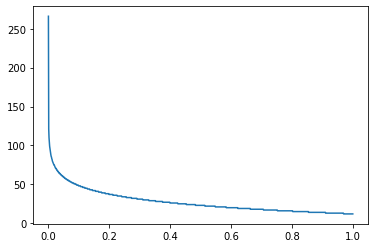

In [19]:
accuracies = np.arange(10**-7, 1, 10**-3)
iterations = []
# First estimates for our parameters
for accuracy in accuracies:
    thet = np.array([[2], [0]])
    thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)[:2]
    for i in range(len(thetaHist)):
        if(np.linalg.norm(thetaHist[i] - correct_exact_theta) <= accuracy):
            iterations.append(i)
            break
plt.plot(accuracies, iterations, "-")

In [155]:
import random
import math
from IPython.display import clear_output
class LogisticRegression():
    def __init__(self, alpha):
        self.alpha = alpha      # learning parameter
        self.maxsteps = 3000    # number of iterations that the algorithm is running
    def fit(self, X, y):
        #Add column of 1s to X
        X = np.array(X)
        X = np.c_[np.ones((X.shape[0], 1)), X]
        #Initial thetas
        self.theta = np.zeros((X.shape[1], 1))
        #thetas = [random.uniform(0, 1) for i in range(X.shape[1])]
        #self.theta = np.array(thetas)[np.newaxis].transpose()
        #fitting
        self.theta, costs = self.gradientDescent(X, y, X.shape[0])[:2]
        return self.theta, costs
        
    def cost_function(self, X, y):
        loss = np.empty((len(y), 1))
        cost = 0
        for i in range(len(X)):
            activation_val = self.activation_function(X[i])
            y_val = 0
            if y.iloc[i] == "tested_positive":
                y_val = 1
            loss[i][0] = (activation_val - y_val)
            cost += (y_val * np.log(activation_val) + (1- y_val) * np.log(1 - activation_val))
        return loss, cost / (-len(X))
    
    def activation_function(self, instance):
        return (1 / (1 + math.exp(-self.theta.transpose().dot(instance))))
    
    def gradientDescent(self, X, y, m):
        # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
        desiredCost = 0.1
        cost = 1000
        i = 0
        costs = []
        xTrans = X.transpose()
        costs = []
        while cost > desiredCost and i < self.maxsteps:
            #theta = theta - alpha * x^T * (h - y) / m
            loss, cost = self.cost_function(X, y)
            grad = X.transpose().dot(loss) / m
            self.theta = self.theta - self.alpha * grad
            costs.append(cost)
            i += 1
        return self.theta , costs
    
    def predict(self, X_test):
        #Add column of 1s to X
        X_test = np.array(X_test)
        X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        result = np.empty((len(X_test), 1))
        for i in range(len(X_test)):
            result[i][0] = self.activation_function(X_test[i])
        return result

In [145]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
data = pd.read_csv("diabetes.csv")
Y = data["class"]
X = data.drop("class", axis=1)
# Normalization (afaik pandas automatically applies this column wise)
X=(X-X.min())/(X.max()-X.min())
#Splitting into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

clf = LogisticRegression()
theta, costs = clf.fit(X_train, Y_train)

Final cost after fitting: 0.48141556233600646


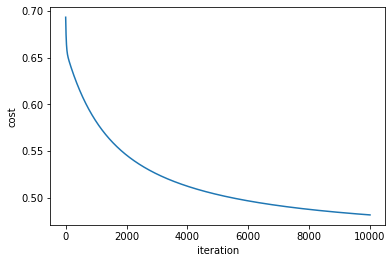

In [146]:
print("Final cost after fitting: "  + str(costs[-1]))
plt.ylabel("cost")
plt.xlabel("iteration")
plt.plot(range(0, len(costs)), costs, "-")

In [147]:
Y_test = Y_test.sort_values()
X_test.index = Y_test.index
Y_pred = clf.predict(X_test)
ys = [1 if val == "tested_positive" else 0 for val in Y_test]
ys_pred = [1 if val > 0.5 else 0 for val in Y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(ys, ys_pred)

0.5877862595419847

0.46580873191912586
0.6500000000000001


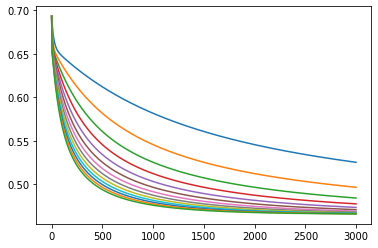

In [156]:
alphas = np.arange(0.05, 0.7, 0.05)       # learning parameter
# First estimates for our parameters
record = 1000
record_alpha = 0
for alpha in alphas:
    clf = LogisticRegression(alpha=alpha)
    costs = clf.fit(X_train, Y_train)[1]
    plt.plot(range(0, len(costs)), costs, "-")
    if costs[-1] < record:
        record = costs[-1]
        record_alpha = alpha
print(record)
print(record_alpha)

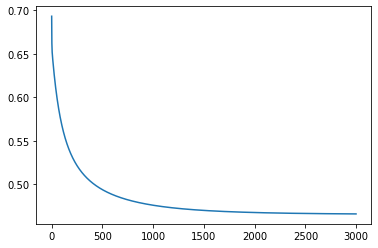

In [157]:
clf = LogisticRegression(alpha=record_alpha)
costs = clf.fit(X_train, Y_train)[1]
plt.plot(range(0, len(costs)), costs, "-")